In [1]:
% cd../../../

/Users/logan/PycharmProjects/apba_rater


/Users/logan/PycharmProjects/apba_rater/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import src.utils.database as db
import pandas as pd
import numpy as np
import src.utils.data_visuals as dv
import matplotlib.pyplot as plt
import src.ratings.predictor as rp


### Data Histogram

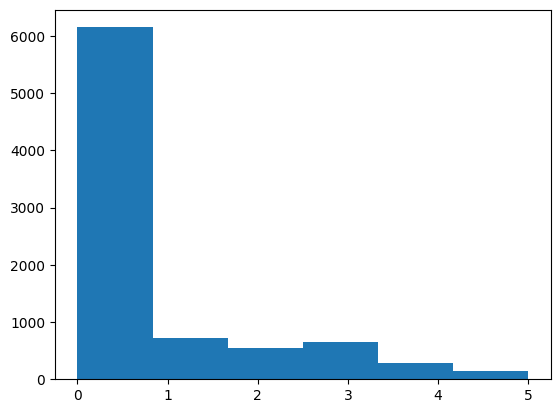

In [3]:
apba = db.load_all_apba()
dv.data_histogram(apba, 'RateFaceoff', 6)

# Data Analysis
Key Details we have available:
- Number of faceoffs
- Facoff Pct. (Faceoffs won / Faceoffs taken)

Remember the first step

In [4]:
rp.ci_face_off_rating(55, 95, 73)

0.33527802942590157

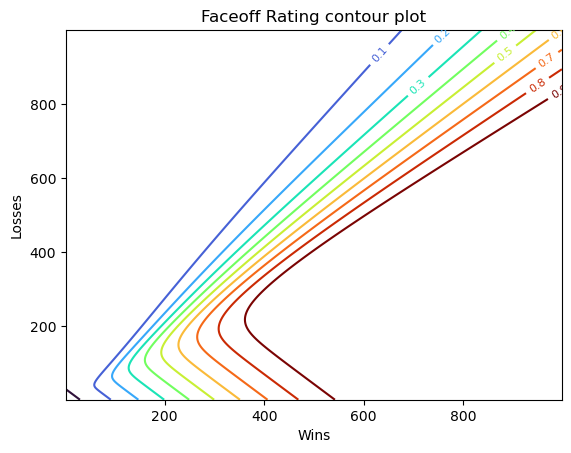

In [6]:
wins = np.arange(1, 1000, 1)
losses = np.arange(1, 1000, 1)

W, L = np.meshgrid(wins, losses)
RATING = rp.ci_face_off_rating(82, W, L)

contour_plot = plt.contour(W, L, RATING, np.arange(0, 1, 0.1), cmap='turbo')

plt.clabel(contour_plot, inline=True, fontsize=8)

plt.xlabel('Wins')
plt.ylabel('Losses')
plt.title('Faceoff Rating contour plot')

plt.show()


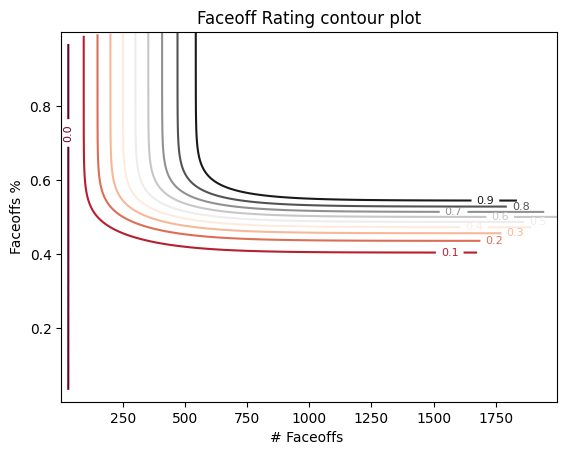

In [5]:
wins = np.arange(1, 1000, 1)
losses = np.arange(1, 1000, 1)

W, L = np.meshgrid(wins, losses)
RATING = rp.ci_face_off_rating(82, W, L)

contour_plot = plt.contour(W + L, W / (W + L), RATING, np.arange(0, 1, 0.1), cmap='RdGy')

plt.clabel(contour_plot, inline=True, fontsize=8)

plt.xlabel('# Faceoffs ')
plt.ylabel('Faceoffs %')
plt.title('Faceoff Rating contour plot')

plt.show()

Now we can see how this works on real data from the previous season


In [20]:
hr_data = db.load_hr(["14-15", "15-16", "16-17", "17-18", "18-19", "19-20", "20-21", "21-22", "22-23"])

hr_data

,Player,Age,Tm,Pos,GP,G,A,PTS,PlusMin,PIM,...,GAPer60,ATOIPP,PPCorsiPercRel,PPGFPer60,PPGAPer60,ATOISH,CorsiForRelSH,SHFPPer60,SHGAPer60,Rk
0,Justin Abdelkader,27.0,DET,LW,71,23,21,44,3,72,...,2.3,2:48,-2.2,9.7,2.1,0:56,1.9,0.0,4.5,NaN
1,Will Acton,27.0,EDM,C,3,0,0,0,-2,5,...,6.4,0:01,NaN,0.0,0.0,1:21,-2.9,0.0,14.8,NaN
2,Luke Adam,24.0,CBJ,C,3,0,0,0,0,4,...,0.0,0:00,NaN,NaN,NaN,0:00,NaN,NaN,NaN,NaN
3,Craig Adams,37.0,PIT,RW,70,1,6,7,-1,44,...,1.6,0:02,11.8,0.0,0.0,2:33,-1.4,0.7,5.0,NaN
4,Andrew Agozzino,24.0,COL,LW,1,0,1,1,1,0,...,0.0,0:00,NaN,NaN,NaN,0:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,Mika Zibanejad,29.0,NYR,C,82,39,52,91,25,20,...,2.1,3:29,7.4,9.8,0.8,1:56,1.1,1.9,7.2,NaN
8209,Radim Zohorna,26.0,TOT,F,10,1,0,1,-1,0,...,4.8,0:27,-21.8,13.0,0.0,0:00,NaN,NaN,NaN,NaN
8210,Artem Zub,27.0,OTT,D,53,3,7,10,2,39,...,2.4,0:06,-5.3,0.0,0.0,1:29,-2.4,0.8,9.1,NaN
8211,Mats Zuccarello,35.0,MIN,LW,78,22,45,67,-3,26,...,2.7,3:46,9.3,9.6,0.4,0:06,8.7,6.8,6.8,NaN


In [27]:
simplified_table = hr_data[["Player", "season", "Pos", "GP", "FOW", "FOL"]]
ratings = []
for games, wins, losses in zip(simplified_table["GP"], simplified_table["FOW"], simplified_table["FOL"]):
    rating = rp.ci_face_off_rating(games, wins, losses) * 5
    try:
        ratings.append(int(rating))
    except:
        ratings.append(0)

simplified_table["FaceoffRating"] = ratings

simplified_table

/var/folders/vj/vb8pc7w56j1f0g_fxnwt5pzh0000gn/T/ipykernel_12836/1293328545.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simplified_table["FaceoffRating"] = ratings


,Player,season,Pos,GP,FOW,FOL,FaceoffRating
0,Justin Abdelkader,14-15,LW,71,7.0,8.0,0
1,Will Acton,14-15,C,3,4.0,4.0,0
2,Luke Adam,14-15,C,3,0.0,0.0,0
3,Craig Adams,14-15,RW,70,17.0,23.0,0
4,Andrew Agozzino,14-15,LW,1,0.0,2.0,0
...,...,...,...,...,...,...,...
8208,Mika Zibanejad,22-23,C,82,692.0,706.0,2
8209,Radim Zohorna,22-23,F,10,21.0,20.0,1
8210,Artem Zub,22-23,D,53,0.0,0.0,0
8211,Mats Zuccarello,22-23,LW,78,24.0,36.0,0


In [28]:
simplified_table.to_csv("data/generated/FaceoffRating.csv", index=False)